# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from util import utils

## Loading the Image

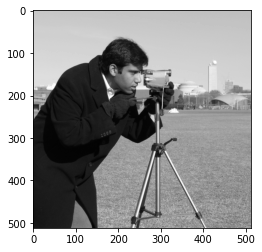

In [2]:
image = utils.uint8_to_float(skimage.data.camera())
plt.imshow(image, cmap="gray")

## Function to plot the different steps in the process

In [3]:
def plot_process(image, fft, kernel, filtered_fft, convolved_image, filter_type: str):
    rows, cols, size, cmap = 1, 5, 4, "gray"
    plt.figure(figsize=(cols*size, rows*size))
    
    # Show original Image
    plt.subplot(rows, cols, 1)
    plt.imshow(image, cmap=cmap)
    # Visualize FFT
    plt.subplot(rows, cols, 2) 
    plt.imshow(utils.fft_to_image(fft), cmap=cmap)
    # Visualize kernel
    plt.subplot(rows, cols, 3)
    plt.imshow(utils.fft_to_image(kernel), cmap=cmap)
    # Visualize filtered FFT image
    plt.subplot(rows, cols, 4)
    plt.imshow(utils.fft_to_image(filtered_fft), cmap=cmap)
    # Visualize filtered spatial image
    plt.subplot(rows, cols, 5)
    plt.imshow(convolved_image, cmap=cmap)
    
    plt.tight_layout()
    plt.savefig(utils.image_output_dir.joinpath(f"task4b-process-{filter_type}"))

# Task 4b
Implement a function that takes an grayscale image, and a kernel in the spatial domain, and applies the convolution theorem. Try it out on the gaussian kernel given in assignment 1, and a horizontal sobel filter ($G_x$).

Include in your report the filtered images and the before/after amplitude |$F\{f\}$| of the transform. Make sure to shift the zero-frequency component to the center before displaying the amplitude.

In [4]:
def convolve_image(image: np.array, kernel: np.array, filter_type: str):
    w, h = image.shape
    
    # Create FFT
    fft = np.fft.fft2(image, (2*w, 2*h))
    # Create filtered FFT image
    kernel = np.fft.fft2(kernel, (2*w, 2*h))
    filtered_fft = np.multiply(fft, kernel)
    # Create filtered spatial image (inverse FFT)
    convolved_image = np.fft.ifft2(filtered_fft, (2*w, 2*h)).real
    convolved_image = convolved_image[0:w, 0:h]
    
    # Plot the different filters and images
    plot_process(image, fft, kernel, filtered_fft, convolved_image, filter_type)
    utils.save_im(f"task4b-{filter_type}.png", convolved_image)
        
    return convolved_image

## Gaussian

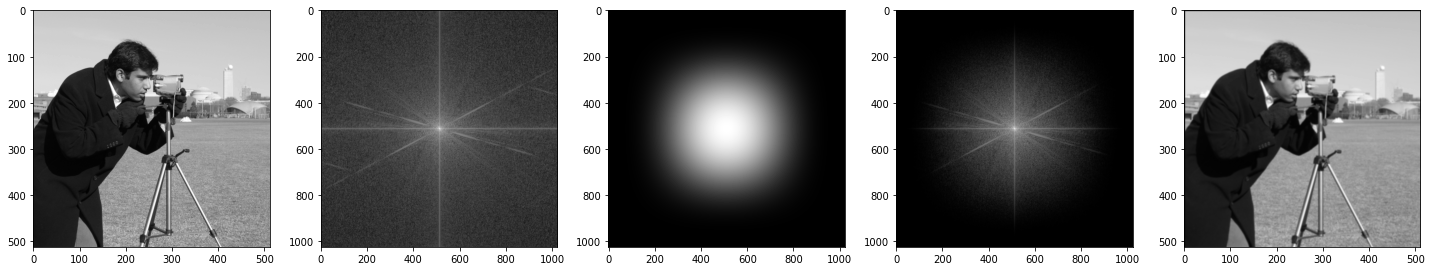

In [5]:
gaussian_kernel = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1],
]) / 256
image_gaussian = convolve_image(image, gaussian_kernel, "gaussian")

## Sobel

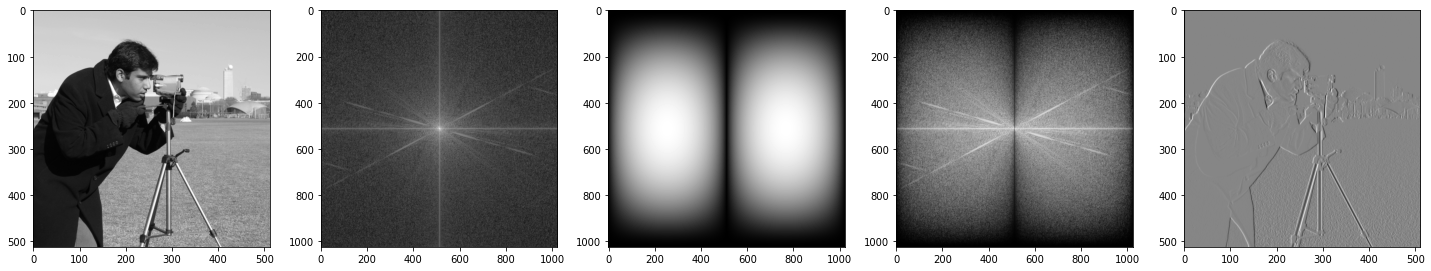

In [6]:
sobel_horizontal = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
image_sobel = convolve_image(image, sobel_horizontal, "sobel")